# Functionalities Import statements

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
import pandas as pd 
from keras.layers import Dense, Flatten, Dropout 
from keras.layers import Embedding
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

import os 
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
# all in one evaluation function
def scores(y_hat):
  preds=pd.DataFrame(y_hat)
  preds.columns=["p"]
  preds["pred"]=preds.p.apply(lambda x: 1 if (x>=0.5) else 0)
  preds["actual"]=pd.DataFrame(y_valid,columns=["actual"])
  preds["coreect"]=preds.pred==preds.actual
  preds.coreect=preds.coreect.astype(int)
  print("accuracy=",preds.coreect.mean())
  a=preds.groupby("actual").coreect.value_counts().unstack()
  a.plot(kind='bar')
  a.columns=["incorrect","correct"]
  print(a)
  y_true1=y_valid
  y_pred_1=preds.pred.values
  print("# Confusion Matrix: ",confusion_matrix(y_true1, y_pred_1),sep="\n")                  # Confusion Matrix
  print("# # Accuracy: ",accuracy_score(y_true1, y_pred_1),sep="\n")                          # Accuracy
  print("# Recall: ",recall_score(y_true1, y_pred_1, average=None),sep="\n")                 # Recall
  print("# Precision: ",precision_score(y_true1, y_pred_1, average=None),sep="\n") 
  print(classification_report(y_true1, y_pred_1)) 

# Dataset pipelining,embedding ... operations

In [26]:
directory = "trained_nn_models"
try:
    os.makedirs(directory, exist_ok = True)
    print("Directory '%s' created successfully" % directory)
except OSError as error:
    print("Directory '%s' can not be created" % directory)
#Training 
epochs = 4;batch_size = 128
#vector-space embedding
n_dim = 64;n_unique_words = 5000;n_words_to_skip = 50;max_review_length = 130;pad_type = trunc_type = 'pre'
n_dense = 128;dropout = 0.5#NN

(X_train,y_train),(X_valid,y_valid) = imdb.load_data(num_words=n_unique_words,skip_top=n_words_to_skip)

Directory 'trained_nn_models' created successfully


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [5]:
X_train.shape,y_train.shape,X_train.shape,y_train.shape

((25000,), (25000,), (25000,), (25000,))

In [12]:
len(X_train[1]),set(y_train)

(189, {0, 1})

# Neural network models

## DNN model

### Training DNN model

In [13]:
word_index = keras.datasets.imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index['PAD']=0;word_index['START']=1;word_index['UNK']=2
index_words = {v:k for k,v in word_index.items()}
' '.join(index_words[id] for id in X_train[0])
(all_x_train,_),(all_x_valid,_) = imdb.load_data() 
X_train = pad_sequences(X_train,maxlen=max_review_length,padding=pad_type,value=0)
X_valid = pad_sequences(X_valid,maxlen=max_review_length,padding=pad_type,value=0)

dnnmodel = Sequential(
    [Embedding(n_unique_words, n_dim, input_length=max_review_length),
                    Flatten(),Dense(n_dense, activation='relu'),Dense(1,activation='sigmoid')])
dnnmodel.summary()
dnnmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

1646592/1641221 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 130, 64)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 8320)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1065088   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,385,217
Trainable params: 1,385,217
Non-trainable params: 0
_________________________________________________________________


In [14]:
dnnhist=dnnmodel.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/4
196/196 [==============================] - 6s 13ms/step - loss: 0.6297 - accuracy: 0.6227 - val_loss: 0.3247 - val_accuracy: 0.8562
Epoch 2/4
196/196 [==============================] - 2s 10ms/step - loss: 0.2280 - accuracy: 0.9128 - val_loss: 0.3337 - val_accuracy: 0.8542
Epoch 3/4
196/196 [==============================] - 2s 10ms/step - loss: 0.0695 - accuracy: 0.9858 - val_loss: 0.4408 - val_accuracy: 0.8443
Epoch 4/4
196/196 [==============================] - 2s 11ms/step - loss: 0.0081 - accuracy: 0.9996 - val_loss: 0.5281 - val_accuracy: 0.8460


### evaluating dnn models performance

92.57146496000001


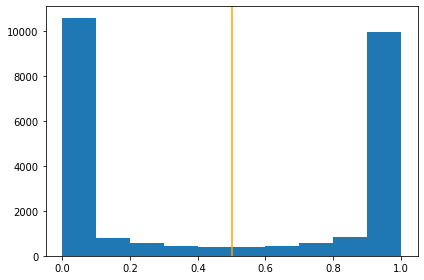

In [15]:
y_hat = dnnmodel.predict(X_valid)
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')
plt.tight_layout()
auc = roc_auc_score(y_valid,y_hat)*100;print(auc)

accuracy= 0.846
        incorrect  correct
actual                    
0            1790    10710
1            2060    10440
# Confusion Matrix: 
[[10710  1790]
 [ 2060 10440]]
# # Accuracy: 
0.846
# Recall: 
[0.8568 0.8352]
# Precision: 
[0.83868442 0.85363859]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.85      0.84      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



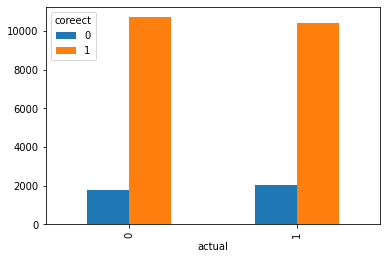

In [17]:
scores(y_hat)
#   print(confusion_matrix(y_true1, y_pred_1))
#   print(classification_report(y_true1, y_pred_1))
# print(accuracy_score(y_true1, y_pred_1))

## RNN Model

### Training  RNN model

In [32]:
from keras.layers import SimpleRNN,SpatialDropout1D # new!
epochs = 4;batch_size = 128#Training 
n_dim = 64;n_unique_words = 5000;max_review_length = 100;pad_type = trunc_type = 'pre';drop_embed = 0.25#vector-space embedding
n_rnn = 256;drop_rnn = 0.2#rnn architecture 
(X_train,y_train),(X_valid,y_valid) = imdb.load_data(num_words=n_unique_words)
X_train = pad_sequences(X_train,maxlen=max_review_length,padding=pad_type,value=0)
X_valid = pad_sequences(X_valid,maxlen=max_review_length,padding=pad_type,value=0)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [33]:
rnnmodel = Sequential([
    Embedding(n_unique_words, n_dim, input_length=max_review_length),
    SpatialDropout1D(drop_embed),
    SimpleRNN(n_rnn, dropout=drop_rnn),
    Dense(1,activation='sigmoid')])
rnnmodel.summary()
rnnmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
rnnhist=rnnmodel.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(X_valid, y_valid))#,callbacks=[modelcheckpoint])
# rnnmodel.load_weights(directory+"/weights_08.hdf5")


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 64)           320000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 100, 64)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 256)               82176     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 402,433
Trainable params: 402,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
196/196 [==============================] - 24s 117ms/step - loss: 0.7080 - accuracy: 0.4985 - val_loss: 0.6980 - val_accuracy: 0.4986
Epoch 2/4
196/196 [==============================] - 23s 116ms/step - loss: 0.6981 - accuracy: 0.5057 

In [30]:
rnnmodel.save_weights("trained_nn_models/weights_08.h5")

### evaluating RNN performance

'63.93'

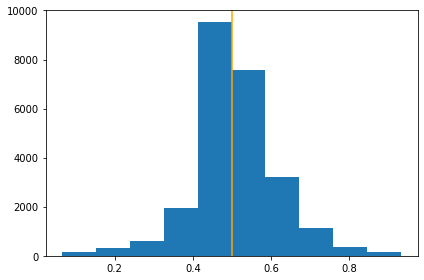

In [34]:
y_hat = rnnmodel.predict(X_valid)
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')
plt.tight_layout()
auc = roc_auc_score(y_valid,y_hat)*100
"{:0.2f}".format(auc)

accuracy= 0.58688
        incorrect  correct
actual                    
0            5011     7489
1            5317     7183
# Confusion Matrix: 
[[7489 5011]
 [5317 7183]]
# # Accuracy: 
0.58688
# Recall: 
[0.59912 0.57464]
# Precision: 
[0.584804   0.58906019]
              precision    recall  f1-score   support

           0       0.58      0.60      0.59     12500
           1       0.59      0.57      0.58     12500

    accuracy                           0.59     25000
   macro avg       0.59      0.59      0.59     25000
weighted avg       0.59      0.59      0.59     25000



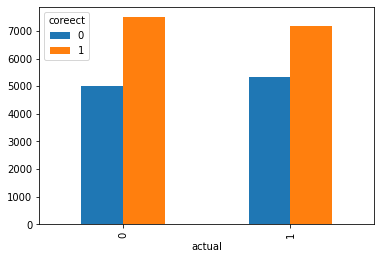

In [36]:
scores(y_hat)

## LSTM MODEL


### Traning LSTM model

In [40]:
from keras.layers import LSTM
output_dir = 'data/lstm'
epochs = 4;batch_size = 128#Training 
n_dim = 64;n_unique_words = 5000;max_review_length = 100;pad_type = trunc_type = 'pre';drop_embed = 0.25 #vector-space embedding
n_lstm = 256;drop_lstm = 0.2#lstm architecture 
(X_train,y_train),(X_valid,y_valid) = imdb.load_data(num_words=n_unique_words)
X_train = pad_sequences(X_train,maxlen=max_review_length,padding=pad_type,value=0)
X_valid = pad_sequences(X_valid,maxlen=max_review_length,padding=pad_type,value=0)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [41]:
lstmmodel = Sequential(
    [Embedding(n_unique_words, n_dim, input_length=max_review_length),
    SpatialDropout1D(drop_embed),LSTM(n_lstm, dropout=drop_lstm),Dense(1,activation='sigmoid')])
lstmmodel.summary()
lstmmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
lstmhist=lstmmodel.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(X_valid, y_valid))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 64)           320000    
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 100, 64)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               328704    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 648,961
Trainable params: 648,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
196/196 [==============================] - 7s 29ms/step - loss: 0.6272 - accuracy: 0.6223 - val_loss: 0.3539 - val_accuracy: 0.8470
Epoch 2/4
196/196 [==============================] - 5s 27ms/step - loss: 0.3168 - accuracy: 0.8673 - va

### evaluating lstm model performance

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


92.62


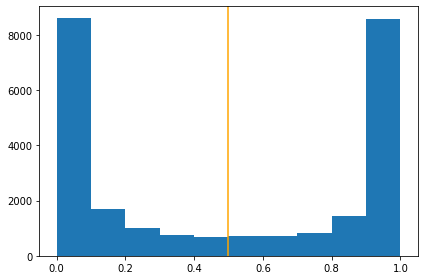

In [43]:
y_hat = lstmmodel.predict_proba(X_valid)
plt.hist(y_hat);_ = plt.axvline(x=0.5, color='orange');plt.tight_layout()
auc = roc_auc_score(y_valid,y_hat)*100;print("{:0.2f}".format(auc))

accuracy= 0.8482
        incorrect  correct
actual                    
0            1774    10726
1            2021    10479
# Confusion Matrix: 
[[10726  1774]
 [ 2021 10479]]
# # Accuracy: 
0.8482
# Recall: 
[0.85808 0.83832]
# Precision: 
[0.84145289 0.85521913]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



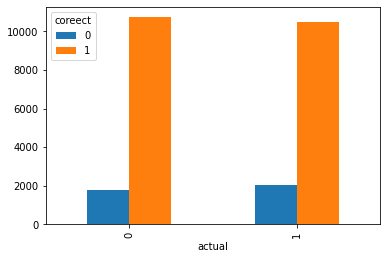

In [44]:
scores(y_hat)

## cnn model

### training cnn model

In [45]:
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPool1D, SpatialDropout1D
output_dir = 'data/conv'
epochs = 4;batch_size = 128#Training 
n_dim = 64;n_unique_words = 5000;max_review_length = 300;pad_type = trunc_type = 'pre';drop_embed = 0.2#vector-space embedding
n_con = 256;k_con = 3#conv 
n_dense = 256;dropout = 0.2#NN
(X_train,y_train),(X_valid,y_valid) = imdb.load_data(num_words=n_unique_words)
X_train = pad_sequences(X_train,maxlen=max_review_length,padding=pad_type,value=0)
X_valid = pad_sequences(X_valid,maxlen=max_review_length,padding=pad_type,value=0)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [46]:
word_index = keras.datasets.imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
#Manually set the PAD , START, UNK indexes 
word_index['PAD']=0
word_index['START']=1
word_index['UNK']=2

cnnmodel = Sequential()
cnnmodel.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
cnnmodel.add(SpatialDropout1D(drop_embed))
cnnmodel.add(Conv1D(n_con,k_con,activation='relu'))
cnnmodel.add(GlobalMaxPooling1D())
cnnmodel.add(Dense(n_dense, activation='relu'))
cnnmodel.add(Dropout(dropout))
cnnmodel.add(Dense(1,activation='sigmoid'))
cnnmodel.summary()
cnnmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
cnnhist=cnnmodel.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(X_valid, y_valid), callbacks=[modelcheckpoint])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 300, 64)           320000    
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 300, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 298, 256)          49408     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [47]:
cnnmodel.save_weights(directory+"/cnnweights_02.h5")

### evaluating cnn model performance

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


95.77


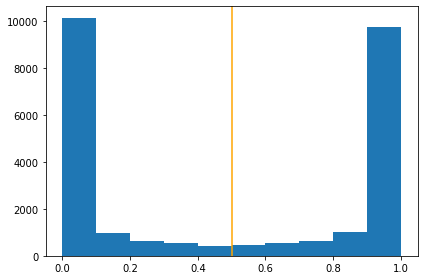

In [48]:
y_hat = cnnmodel.predict_proba(X_valid)
plt.hist(y_hat);_ = plt.axvline(x=0.5, color='orange');plt.tight_layout()
auc = roc_auc_score(y_valid,y_hat)*100;print("{:0.2f}".format(auc))

accuracy= 0.8902
        incorrect  correct
actual                    
0            1313    11187
1            1432    11068
# Confusion Matrix: 
[[11187  1313]
 [ 1432 11068]]
# # Accuracy: 
0.8902
# Recall: 
[0.89496 0.88544]
# Precision: 
[0.88652033 0.89395041]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12500
           1       0.89      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



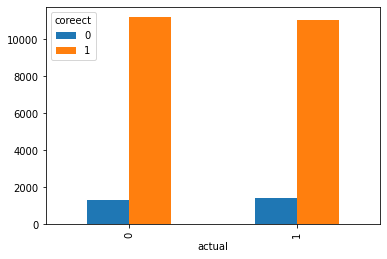

In [50]:
scores(y_hat)

# Comparision of all the base NN models

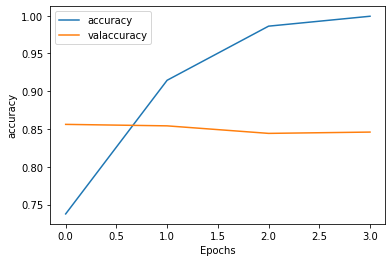

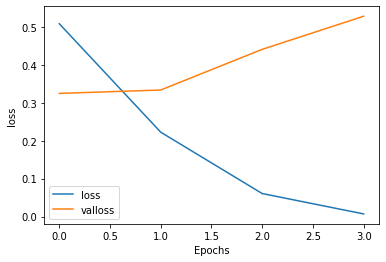

In [51]:

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,"val"+string])
  plt.show()
  

plot_graphs(dnnhist, 'accuracy')
plot_graphs(dnnhist, 'loss')
# plt.show()

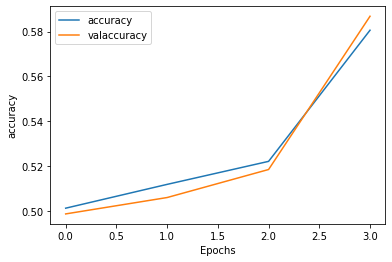

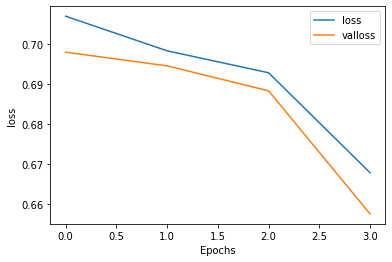

In [52]:
plot_graphs(rnnhist, 'accuracy')
plot_graphs(rnnhist, 'loss')

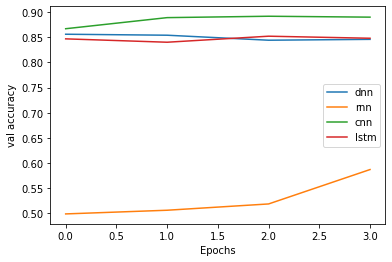

In [53]:
def plot_graphs(history, string):
  plt.plot(history.history['val_'+string])
plot_graphs(dnnhist,"accuracy")
plot_graphs(rnnhist,"accuracy")
plot_graphs(cnnhist,"accuracy")
plot_graphs(lstmhist,"accuracy")
plt.xlabel("Epochs")
plt.ylabel("val accuracy")
plt.legend(["dnn","rnn","cnn","lstm"])
plt.show()

In [ ]:
# #y_valid
# import pandas as pd
# preds=pd.DataFrame(y_hat)
# preds.columns=["p"]
# preds["pred"]=preds.p.apply(lambda x: 1 if (x>=0.5) else 0)
# preds["actual"]=pd.DataFrame(y_valid,columns=["actual"])
# preds.head(3)
# preds["coreect"]=preds.pred==preds.actual
# preds.head(3)
# preds.coreect=preds.coreect.astype(int)
# print("accuracy=",preds.coreect.mean())
# a=preds.groupby("actual").coreect.value_counts().unstack()
# a.plot(kind='bar')
# a.columns=["incorrect","correct"]
# print(a)
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# y_true1=y_valid
# y_pred_1=preds.actual.values
# print("# Confusion Matrix: ",confusion_matrix(y_true1, y_pred_1),sep="\n")                  # Confusion Matrix
# print("# # Accuracy: ",accuracy_score(y_true1, y_pred_1),sep="\n")                          # Accuracy
# print("# Recall: ",recall_score(y_true1, y_pred_1, average=None),sep="\n")                 # Recall
# print("# Precision: ",precision_score(y_true1, y_pred_1, average=None),sep="\n")  

# print(confusion_matrix(y_true1, y_pred_1))
# print(classification_report(y_true1, y_pred_1))
# print(accuracy_score(y_true1, y_pred_1))
# preds.head()
# # heat map
# import seaborn as sns
# from sklearn import metrics
# cm = metrics.confusion_matrix(preds.actual.values, preds.pred.values)
# print(cm)
# import numpy as np
# predictions=preds.pred.values
# y_test=preds.actual.values
# score=np.mean(predictions == y_test)
# plt.figure(figsize=(9,9))
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
# plt.ylabel('Actual label');
# plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(score)
# plt.title(all_sample_title, size = 15);